In [1]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
from itertools import product
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from scratch_clustering import ScratchKMeans

In [5]:
X, _ = make_blobs(n_samples=1000, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)
km = ScratchKMeans(n_clusters=4,n_init=100,max_iter=1000)
km.fit(X)
print(km.best_sse)

455


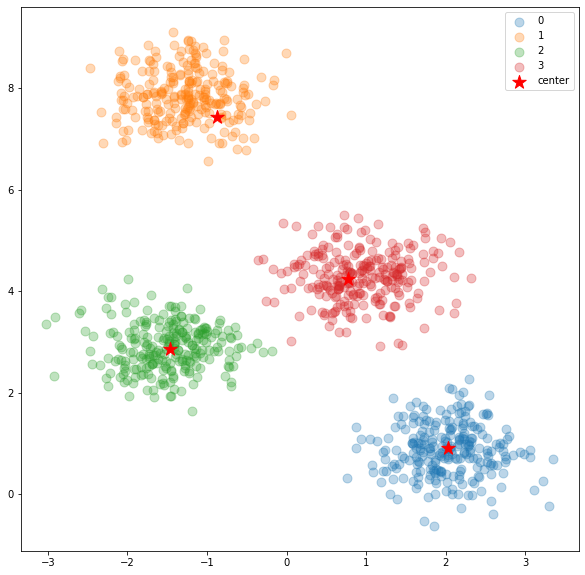

In [6]:
def plot_clusters(X,km):
    k = km.n_clusters
    pred_class = km.predict(X)
    pred = np.concatenate((X,pred_class),axis=1)
    fig,ax = plt.subplots(1,1,figsize=(10,10))
    #ax.set_xlim(-2.5,3.5)
    #ax.set_ylim(-0.5,9)
    #color = ["pink","blue","green","k"]
    for i in range(k):
        index = np.where(pred[:,-1]==i)[0]
        ax.scatter(X[index,0],X[index,1],alpha=0.3,label=i,s=80)
    ax.scatter(km.true_center[:,0],km.true_center[:,1],marker="*",color="red",label="center",s=200)
    ax.legend()
    plt.show()
    
km = ScratchKMeans(n_clusters=4,n_init=1000,max_iter=100)
km.fit(X)
plot_clusters(X,km)

上のように、綺麗に分類することができた。

次にエルボー法を実装する。(K-meansにおいて中心点の個数kは人為的に決める必要があるが、その判断方法としてエルボー法がある。)

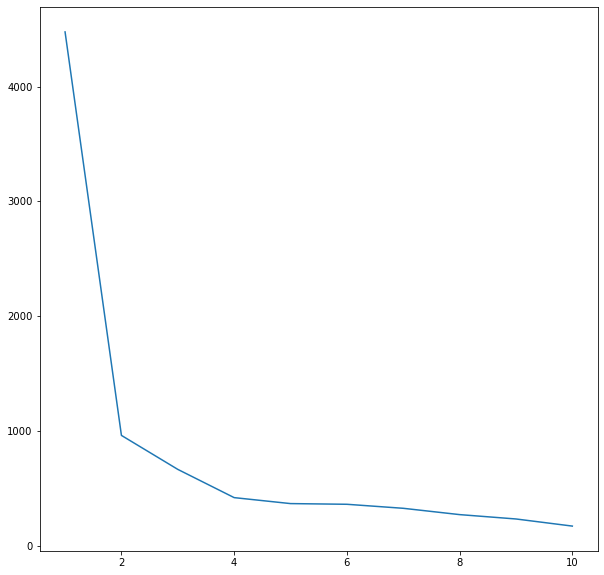

In [7]:
#k個の分類方法の結果をプロットする関数
def plot_elbow(X,k,max_iter=100,n_init=100):
    for i in range(1,k+1):
        if i == 1:
            sse_list = np.empty(k)
        km = ScratchKMeans(n_clusters=i,n_init=n_init,max_iter=max_iter)
        km.fit(X)
        sse_list[i-1] = km.best_sse
    fig,ax = plt.subplots(1,1,figsize=(10,10))
    ax.plot(np.arange(1,k+1),sse_list)
    plt.show()
plot_elbow(X,10)

２つ上のセルでは、中心点を４つとしてデータを扱ったが、２でも良さそうなので試してみる。

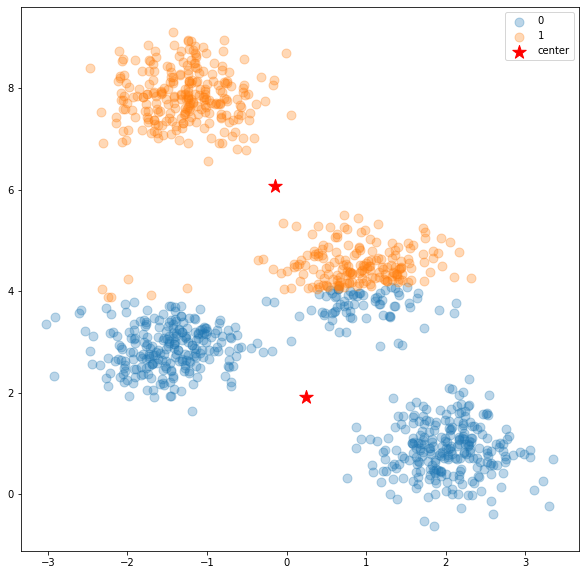

In [8]:
km = ScratchKMeans(n_clusters=2,n_init=1000,max_iter=100)
km.fit(X)
plot_clusters(X,km)

グラフを見てみるとイマイチな結果になってる気がする。  
やはり４つがベストだろう。

In [ ]:
print("abc")